# Probe-fed patch antenna

This example shows how to use the ``Stackup3D`` class
to create and analyze a patch antenna in HFSS.

Note that the HFSS 3D Layout interface may offer advantages for
laminate structures such as the patch antenna.

Keywords: **HFSS**, **terminal**, **antenna**., **patch**.

## Perform imports and define constants

Perform required imports.

In [1]:
import os
import tempfile
import time

In [2]:
import ansys.aedt.core
from ansys.aedt.core.modeler.advanced_cad.stackup_3d import Stackup3D

Define constants.

In [3]:
AEDT_VERSION = "2024.2"
NUM_CORES = 4
NG_MODE = False  # Open AEDT UI when it is launched.

## Create temporary directory

Create a temporary directory where downloaded data or
dumped data can be stored.
If you'd like to retrieve the project data for subsequent use,
the temporary folder name is given by ``temp_folder.name``.

In [4]:
temp_folder = tempfile.TemporaryDirectory(suffix=".ansys")

## Launch HFSS

Launch HFSS and change the length units.

In [5]:
project_name = os.path.join(temp_folder.name, "patch.aedt")
hfss = ansys.aedt.core.Hfss(
    project=project_name,
    solution_type="Terminal",
    design="patch",
    non_graphical=NG_MODE,
    new_desktop=True,
    version=AEDT_VERSION,
)

PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: PyAEDT version 0.12.dev0.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: Log on console is enabled.


PyAEDT INFO: Log on file C:\Users\ansys\AppData\Local\Temp\pyaedt_ansys_1b571569-a38b-46aa-9051-bc428793e374.log is enabled.


PyAEDT INFO: Log on AEDT is enabled.


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Launching PyAEDT with gRPC plugin.


PyAEDT INFO: New AEDT session is starting on gRPC port 57726


PyAEDT INFO: AEDT installation Path C:\Program Files\AnsysEM\v242\Win64


PyAEDT INFO: Ansoft.ElectronicsDesktop.2024.2 version started with process ID 4700.


PyAEDT INFO: Project patch has been created.


PyAEDT INFO: Added design 'patch' of type HFSS.


PyAEDT INFO: Aedt Objects correctly read


In [6]:
length_units = "mm"
freq_units = "GHz"
hfss.modeler.model_units = length_units

PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 1sec


## Create patch

Create the patch.

In [7]:
stackup = Stackup3D(hfss)
ground = stackup.add_ground_layer(
    "ground", material="copper", thickness=0.035, fill_material="air"
)
dielectric = stackup.add_dielectric_layer(
    "dielectric", thickness="0.5" + length_units, material="Duroid (tm)"
)
signal = stackup.add_signal_layer(
    "signal", material="copper", thickness=0.035, fill_material="air"
)
patch = signal.add_patch(
    patch_length=9.57, patch_width=9.25, patch_name="Patch", frequency=1e10
)

stackup.resize_around_element(patch)
pad_length = [3, 3, 3, 3, 3, 3]  # Air bounding box buffer in mm.
region = hfss.modeler.create_region(pad_length, is_percentage=False)
hfss.assign_radiation_boundary_to_objects(region)

patch.create_probe_port(ground, rel_x_offset=0.485)

PyAEDT INFO: Materials class has been initialized! Elapsed time: 0m 0sec


PyAEDT WARNING: The closer the ratio between wave length and the width is to 1, the less correct the impedance calculation is


PyAEDT INFO: Boundary Radiation Rad__1WI3BQ has been correctly created.


PyAEDT INFO: Boundary Perfect E Probe_PEC has been correctly created.


PyAEDT INFO: Boundary AutoIdentify Probe_Port has been correctly created.


## Set up simulation
Set up a simulation and analyze it.

In [8]:
setup = hfss.create_setup(name="Setup1", setup_type="HFSSDriven", Frequency="10GHz")

setup.create_frequency_sweep(
    unit="GHz",
    name="Sweep1",
    start_frequency=8,
    stop_frequency=12,
    sweep_type="Interpolating",
)

hfss.save_project()
hfss.analyze(cores=NUM_CORES)

PyAEDT INFO: Linear count sweep Sweep1 has been correctly created


PyAEDT INFO: Project patch Saved correctly


PyAEDT INFO: Key Desktop/ActiveDSOConfigurations/HFSS correctly changed.


PyAEDT INFO: Solving all design setups.


PyAEDT INFO: Key Desktop/ActiveDSOConfigurations/HFSS correctly changed.


PyAEDT INFO: Design setup None solved correctly in 0.0h 1.0m 6.0s


True

## Plot S11


PyAEDT INFO: Parsing C:/Users/ansys/AppData/Local/Temp/tmpoj3qo8ns.ansys/patch.aedt.


PyAEDT INFO: File C:/Users/ansys/AppData/Local/Temp/tmpoj3qo8ns.ansys/patch.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.03241395950317383


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Solution Data Correctly Loaded.


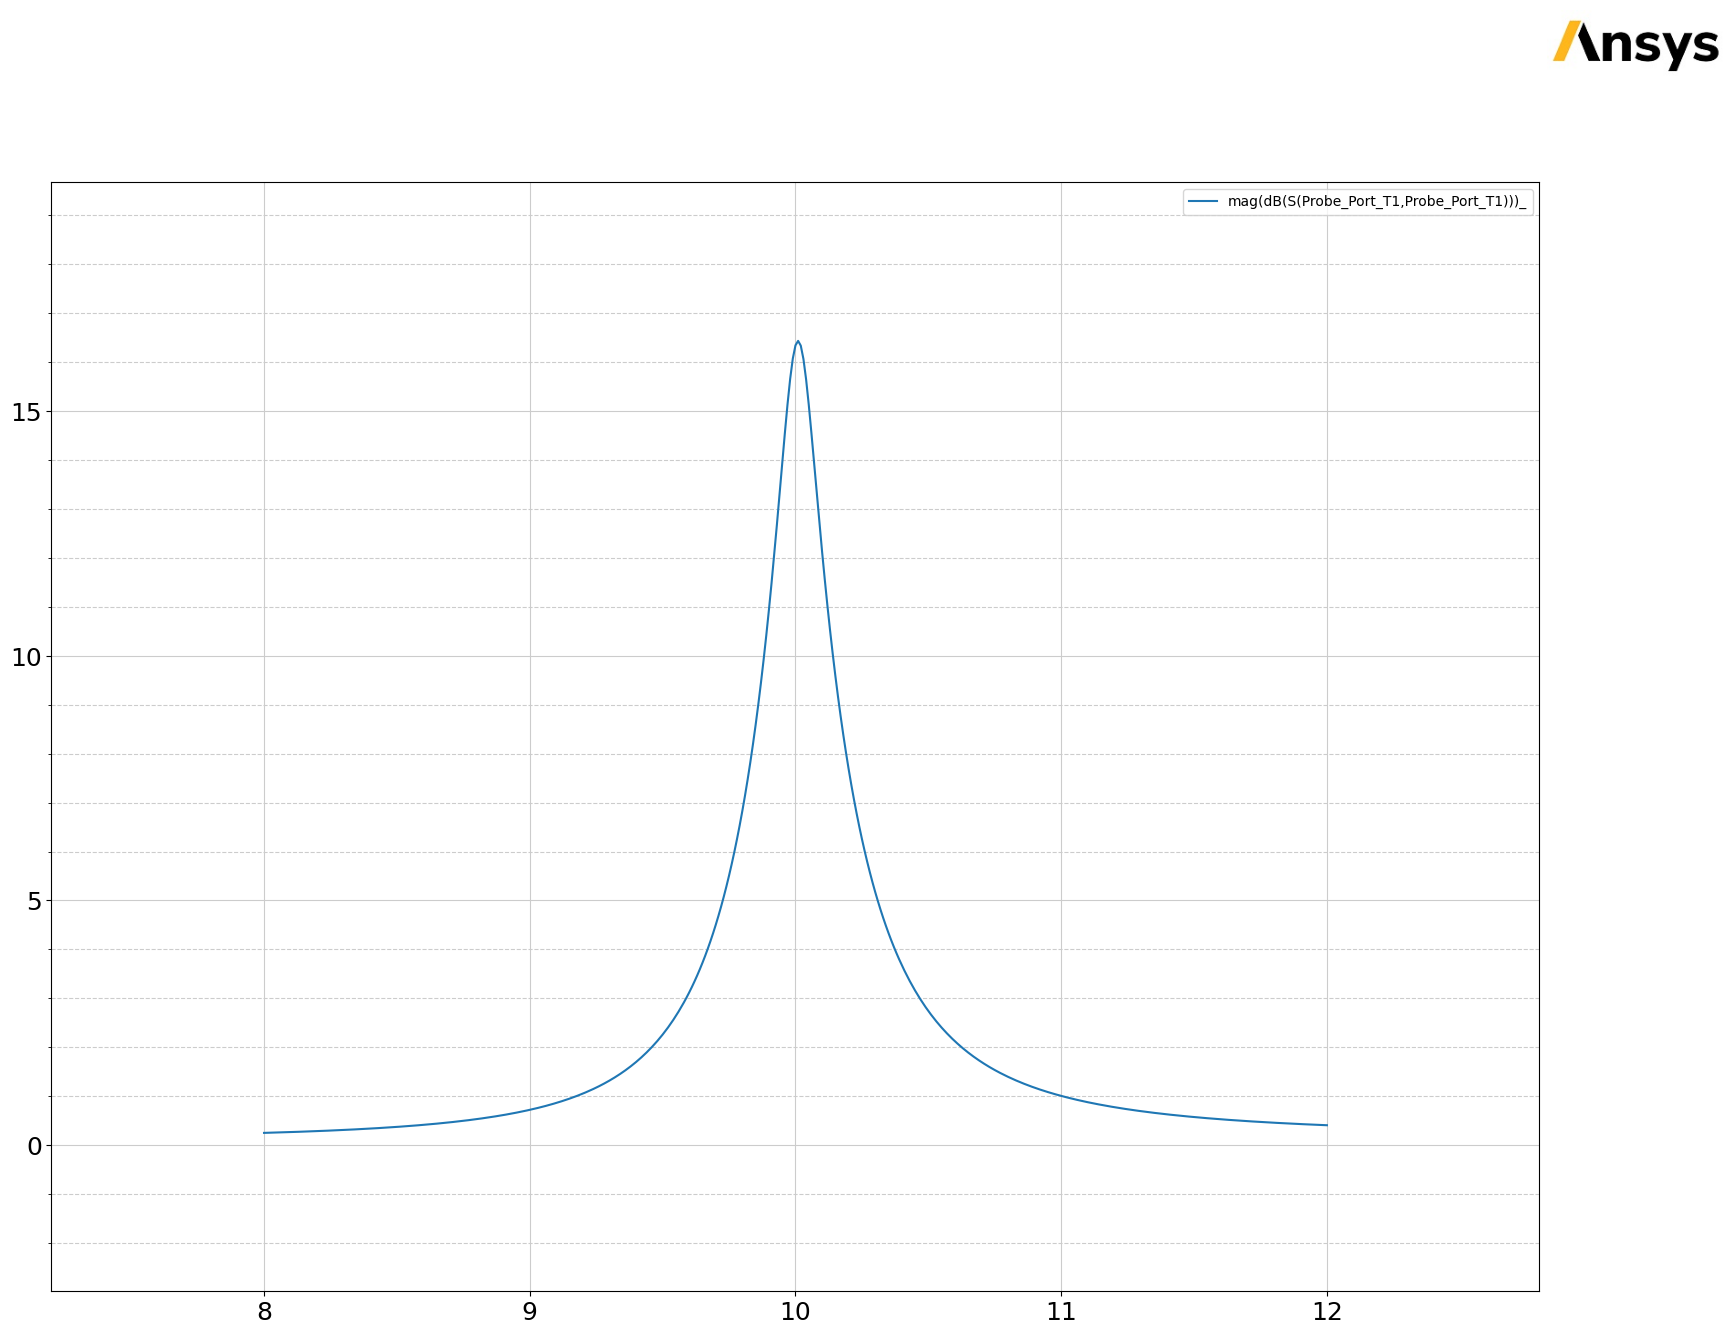

In [9]:
plot_data = hfss.get_traces_for_plot()
report = hfss.post.create_report(plot_data)
solution = report.get_solution_data()
plt = solution.plot(solution.expressions)

## Release AEDT

Release AEDT.

In [10]:
hfss.save_project()
hfss.release_desktop()
# Wait 3 seconds to allow AEDT to shut down before cleaning the temporary directory.
time.sleep(3)

PyAEDT INFO: Project patch Saved correctly


PyAEDT INFO: Desktop has been released and closed.


## Clean up

All project files are saved in the folder ``temp_folder.name``.
If you've run this example as a Jupyter notebook, you
can retrieve those project files. The following cell removes
all temporary files, including the project folder.

In [11]:
temp_folder.cleanup()